In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier




In [4]:
df=pd.read_csv('dermatology_database_1.csv')
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [8]:
print(df['age'].info(),df['age'].head())

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: age
Non-Null Count  Dtype 
--------------  ----- 
366 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB
None 0    55
1     8
2    26
3    40
4    45
Name: age, dtype: object


In [9]:
df['age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [10]:
df['age'].replace("?",np.nan,inplace=True)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             358 non-null    int64  
 1   scaling                              358 non-null    int64  
 2   definite_borders                     358 non-null    int64  
 3   itching                              358 non-null    int64  
 4   koebner_phenomenon                   358 non-null    int64  
 5   polygonal_papules                    358 non-null    int64  
 6   follicular_papules                   358 non-null    int64  
 7   oral_mucosal_involvement             358 non-null    int64  
 8   knee_and_elbow_involvement           358 non-null    int64  
 9   scalp_involvement                    358 non-null    int64  
 10  family_history                       358 non-null    int64  
 11  melanin_incontinence                 

In [12]:
print(df.describe())

         erythema     scaling  definite_borders     itching  \
count  358.000000  358.000000        358.000000  358.000000   
mean     2.078212    1.807263          1.569832    1.354749   
std      0.664865    0.701541          0.900909    1.135062   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.750000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          358.000000         358.000000          358.000000   
mean             0.636872           0.449721            0.170391   
std              0.908709           0.956468            0.576394   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.00000

In [13]:
df.duplicated().sum()

np.int64(0)

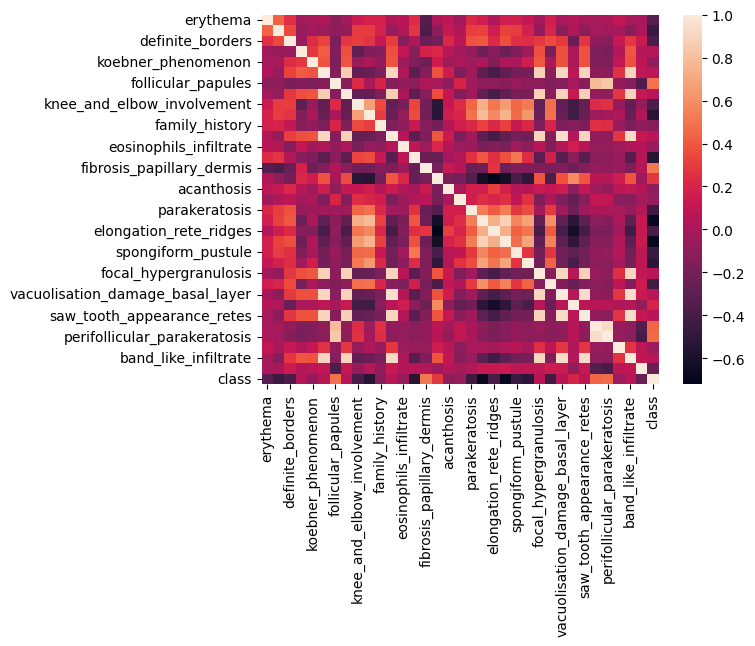

In [14]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [15]:
def checkerCorrelationPairs(df, threshold):
    corr = df.corr()
    high_corr_pairs = []
    
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                col1 = corr.columns[i]
                col2 = corr.columns[j]
                high_corr_pairs.append((col1, col2))
    
    return high_corr_pairs

In [16]:
pairs=checkerCorrelationPairs(df,0.9)

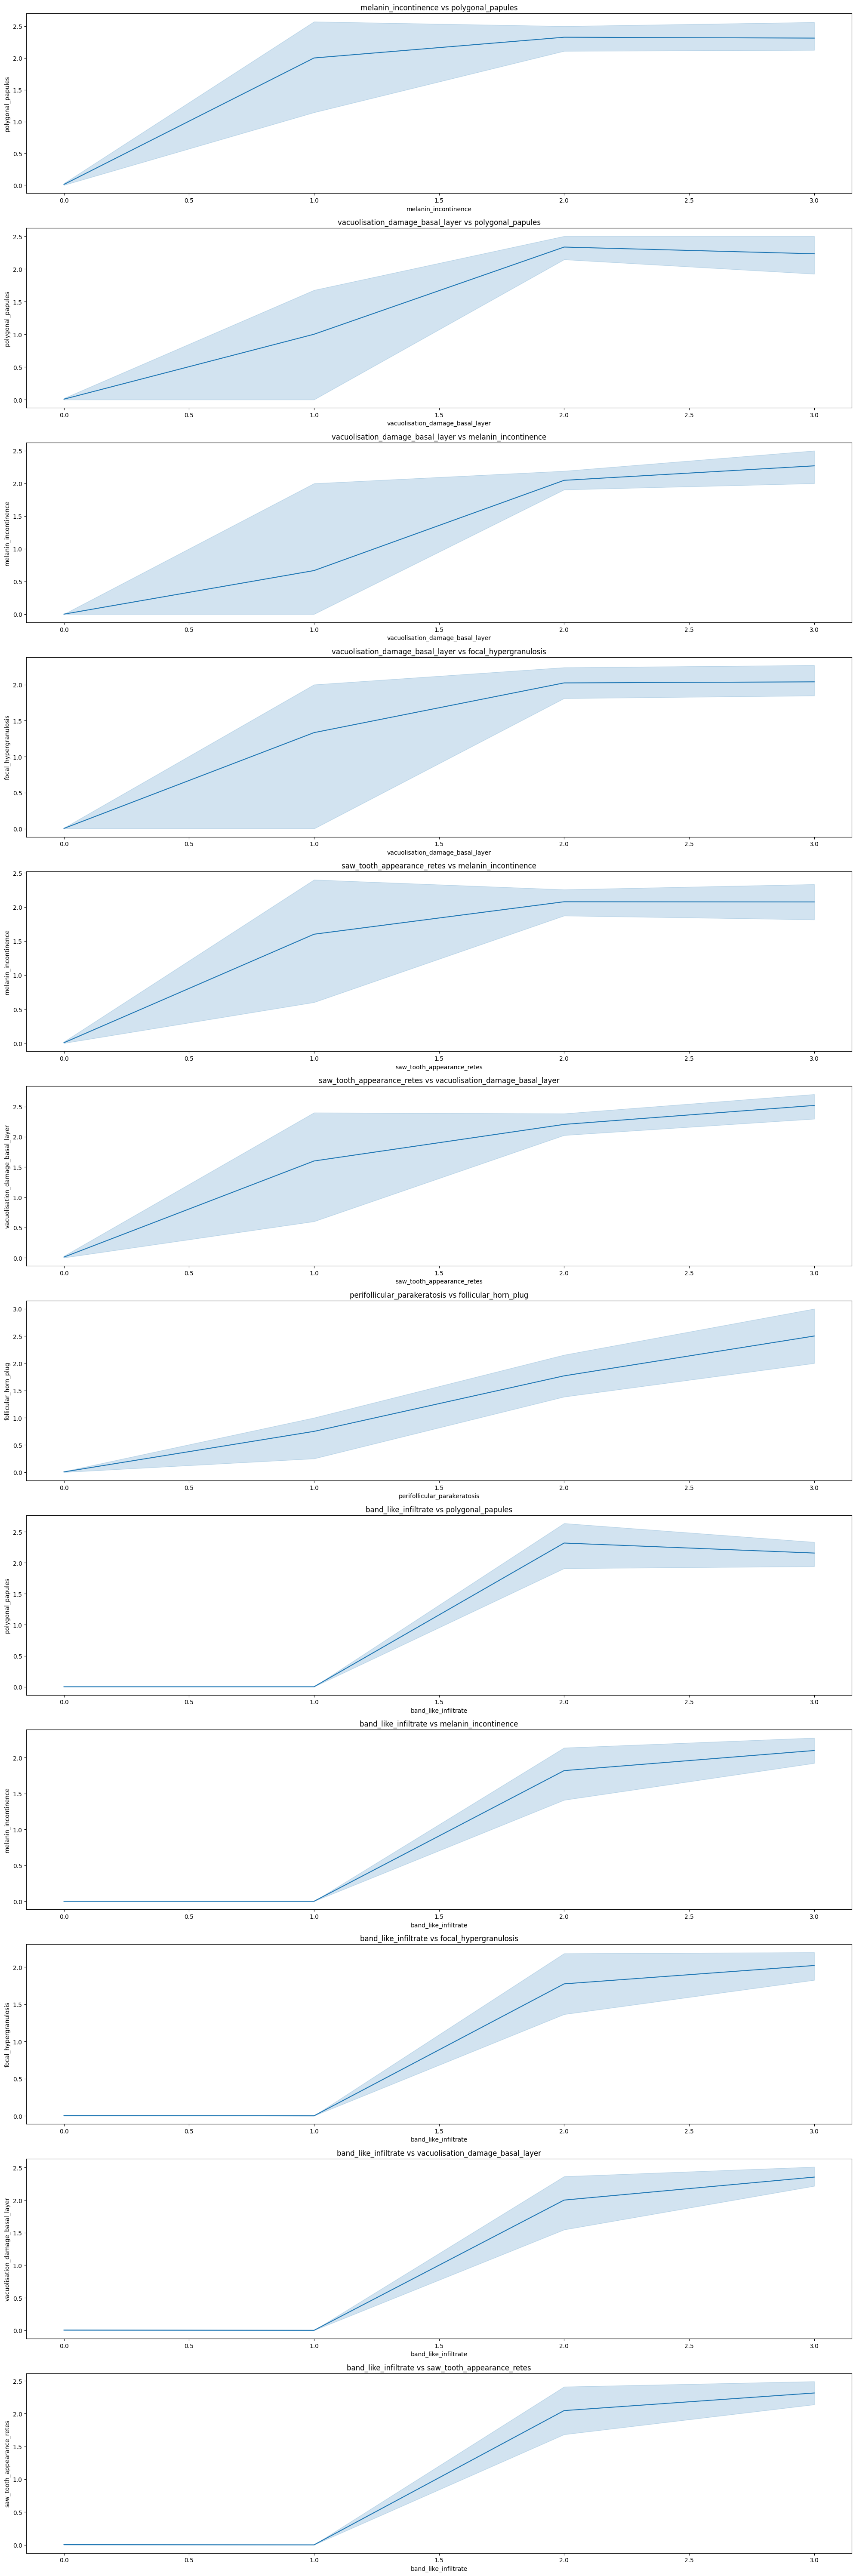

In [17]:
fig, axes = plt.subplots(len(pairs), 1, figsize=(20, 5*len(pairs)))
axes=axes.flatten()

for i,(col1,col2) in enumerate(pairs):
    sns.lineplot(data=df,x=col1,y=col2,ax=axes[i])
    axes[i].set_title(f"{col1} vs {col2}")
    
plt.tight_layout()
plt.show()
            

In [18]:
outlier_count = {}

for col in df.columns:
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_count[col] = count
outlier_count

{'erythema': 4,
 'scaling': 0,
 'definite_borders': 0,
 'itching': 0,
 'koebner_phenomenon': 18,
 'polygonal_papules': 68,
 'follicular_papules': 33,
 'oral_mucosal_involvement': 66,
 'knee_and_elbow_involvement': 23,
 'scalp_involvement': 16,
 'family_history': 44,
 'melanin_incontinence': 69,
 'eosinophils_infiltrate': 42,
 'PNL_infiltrate': 7,
 'fibrosis_papillary_dermis': 50,
 'exocytosis': 0,
 'acanthosis': 149,
 'hyperkeratosis': 5,
 'parakeratosis': 0,
 'clubbing_rete_ridges': 0,
 'elongation_rete_ridges': 0,
 'thinning_suprapapillary_epidermis': 0,
 'spongiform_pustule': 69,
 'munro_microabcess': 79,
 'focal_hypergranulosis': 70,
 'disappearance_granular_layer': 14,
 'vacuolisation_damage_basal_layer': 71,
 'spongiosis': 0,
 'saw_tooth_appearance_retes': 71,
 'follicular_horn_plug': 22,
 'perifollicular_parakeratosis': 21,
 'inflammatory_mononuclear_infiltrate': 0,
 'band_like_infiltrate': 76,
 'age': 0,
 'class': 0}

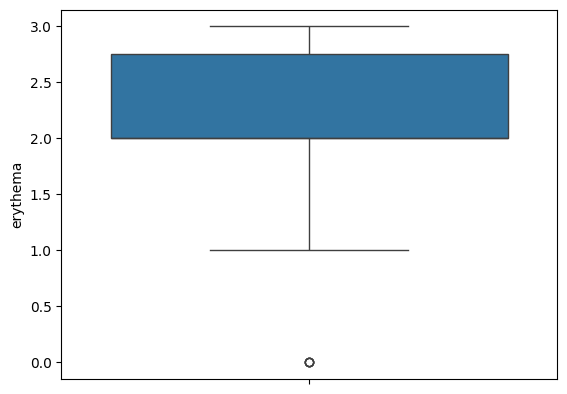

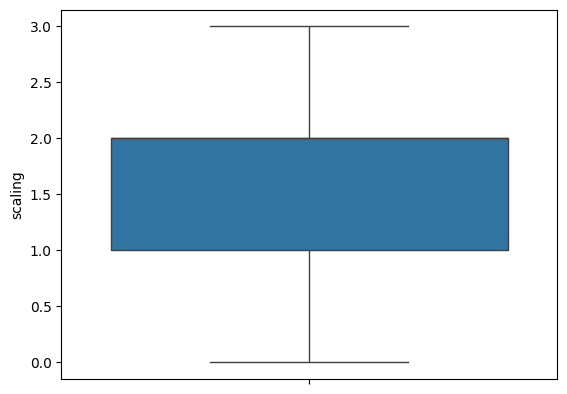

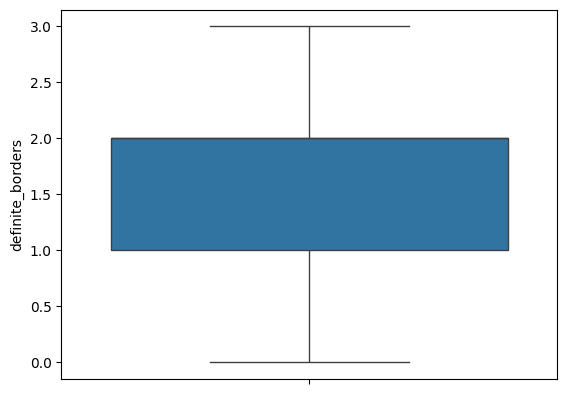

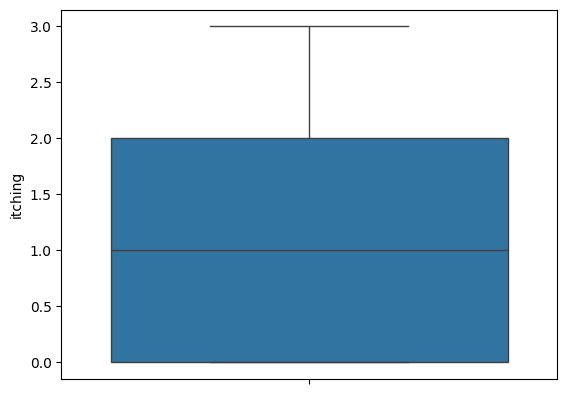

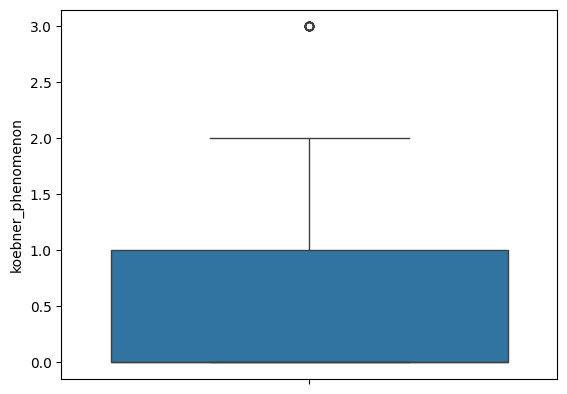

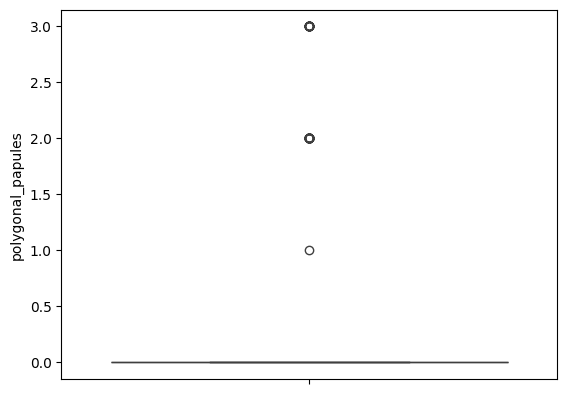

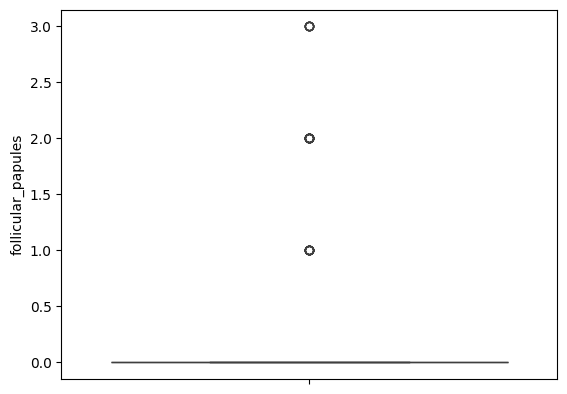

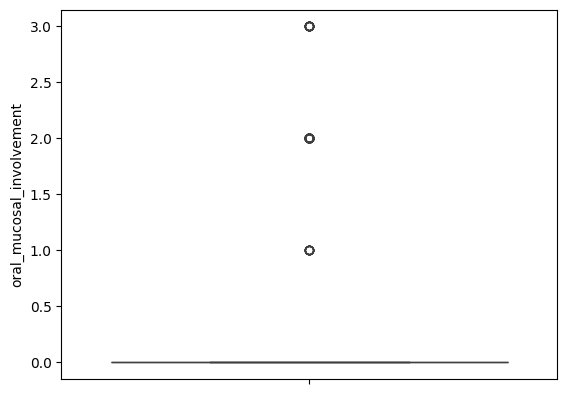

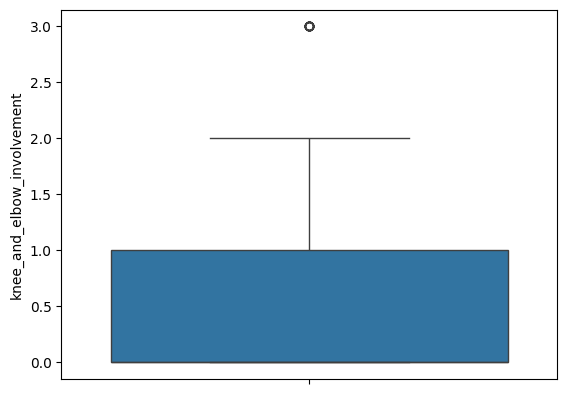

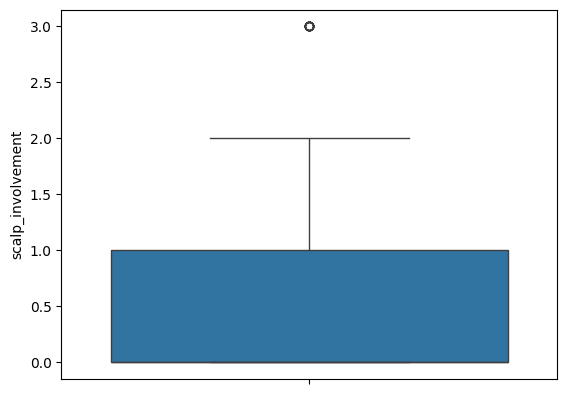

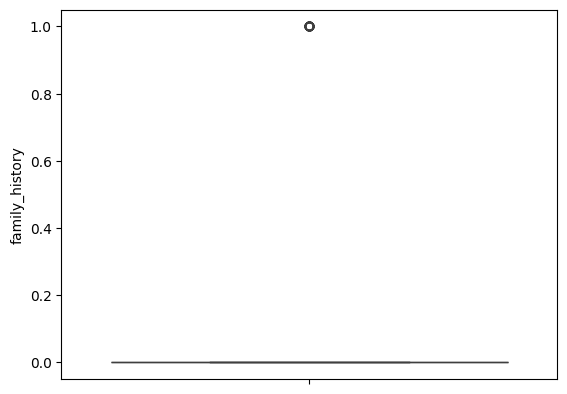

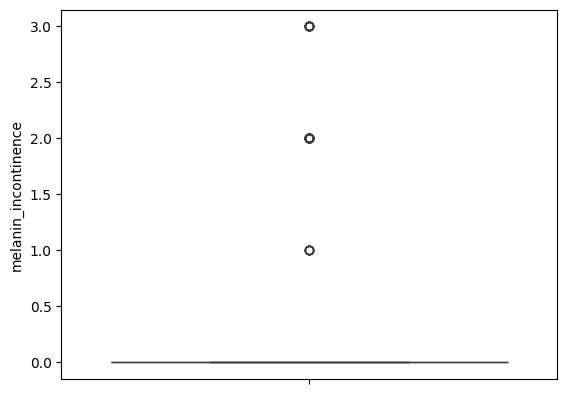

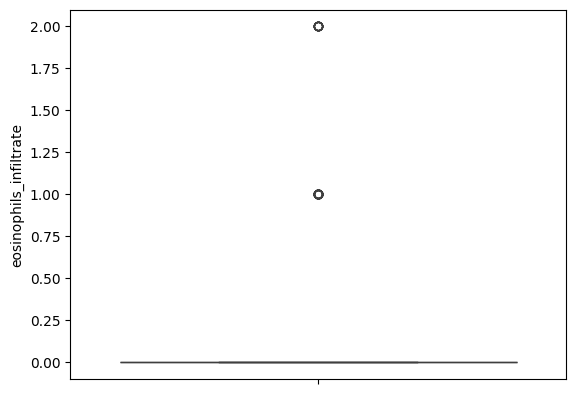

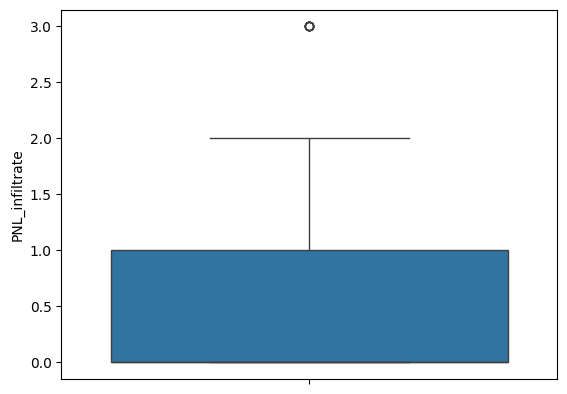

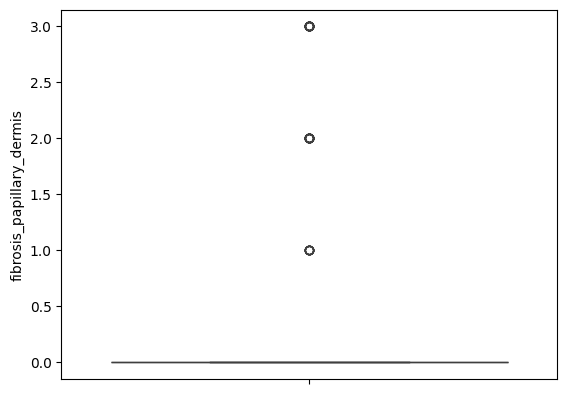

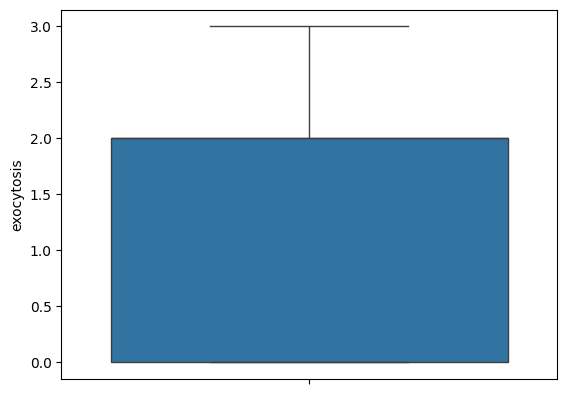

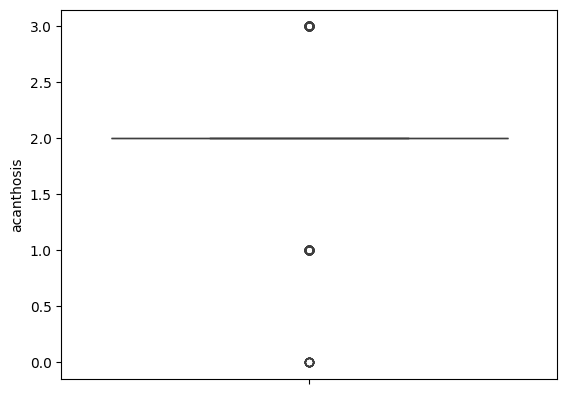

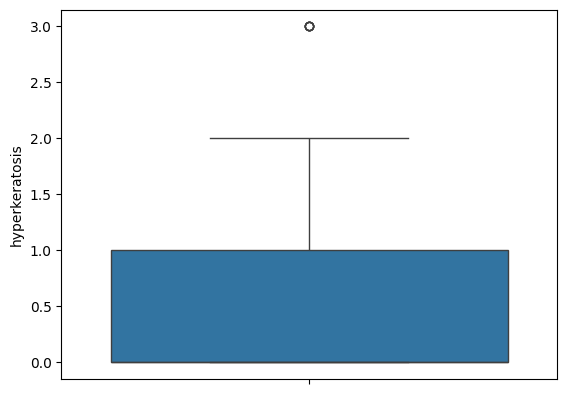

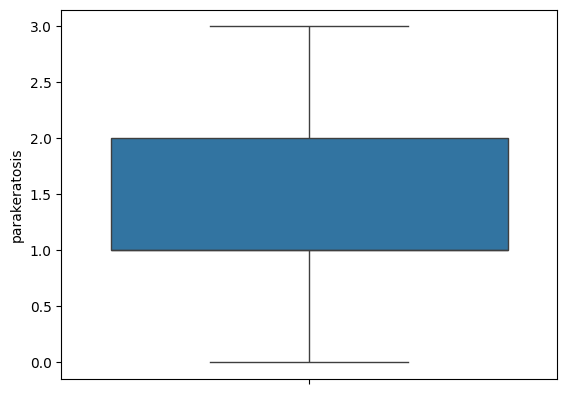

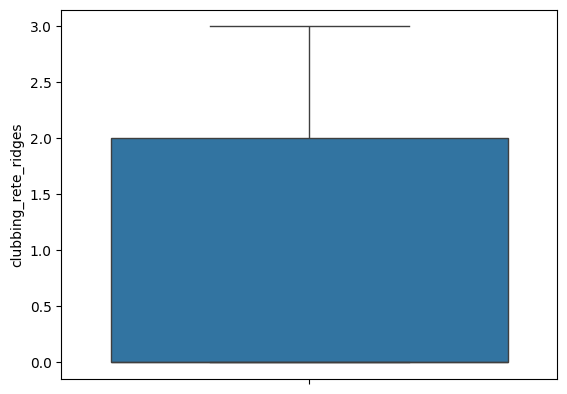

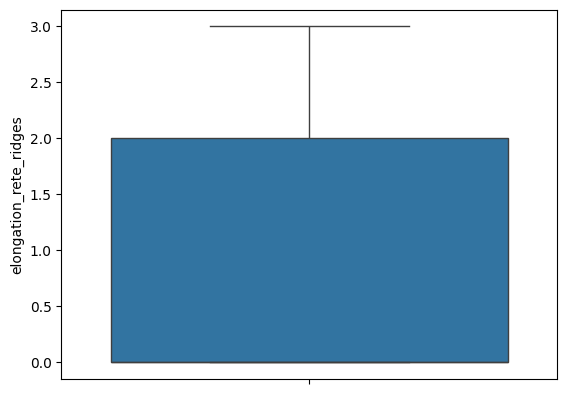

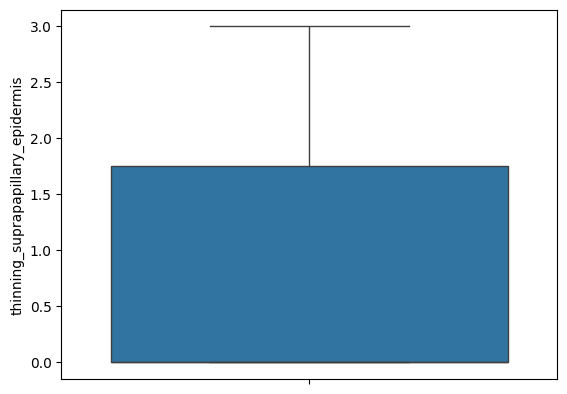

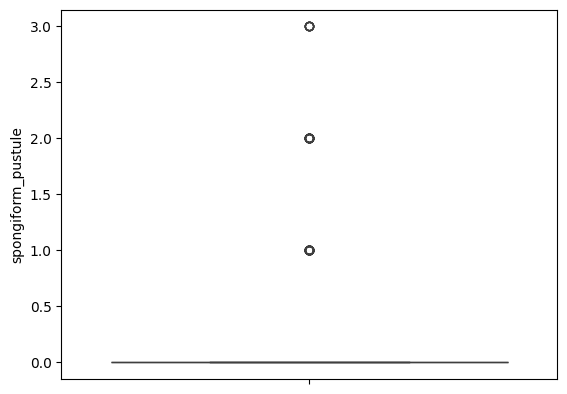

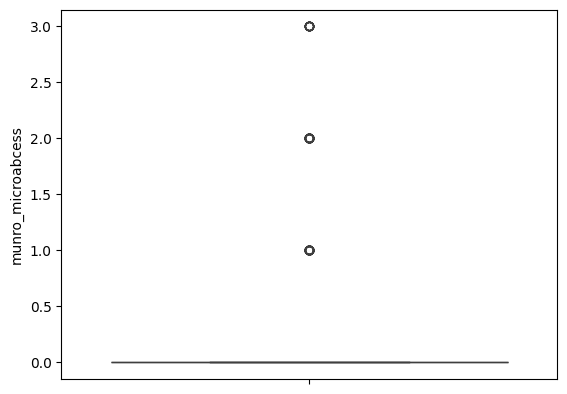

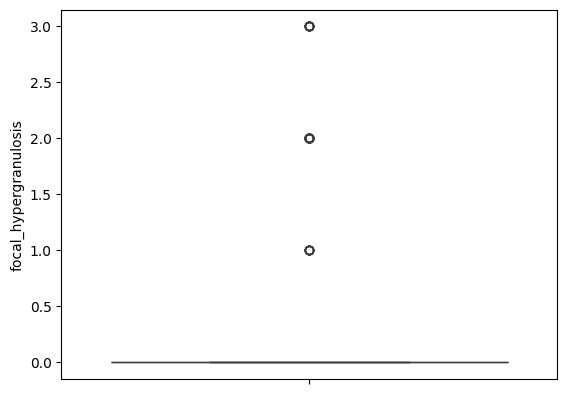

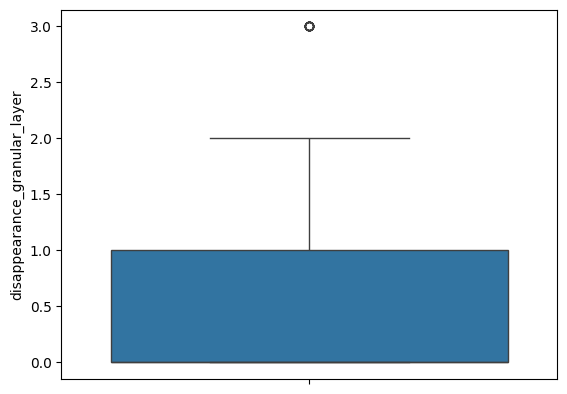

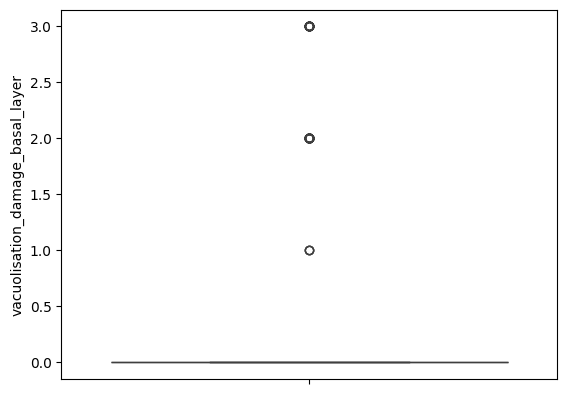

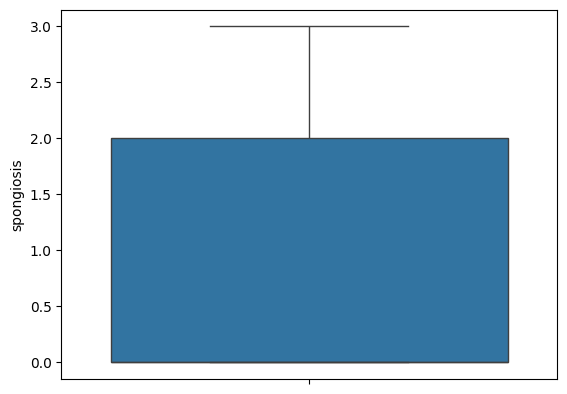

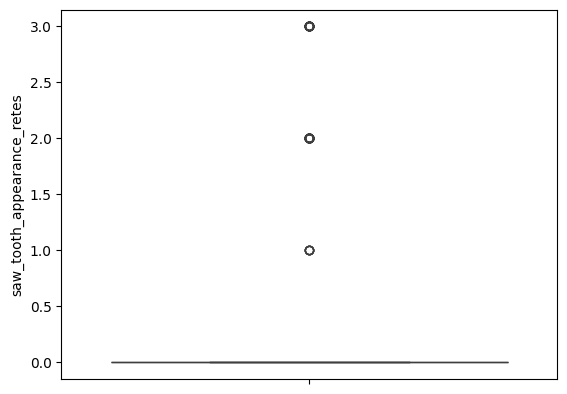

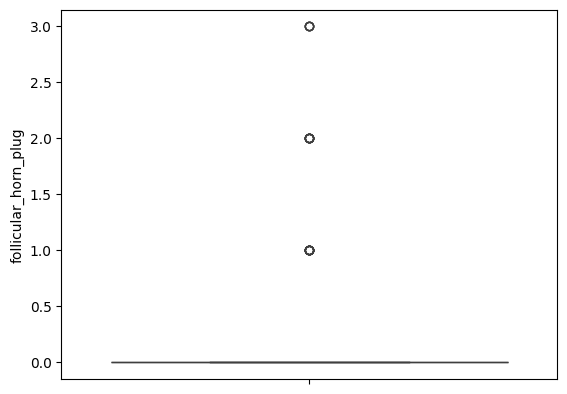

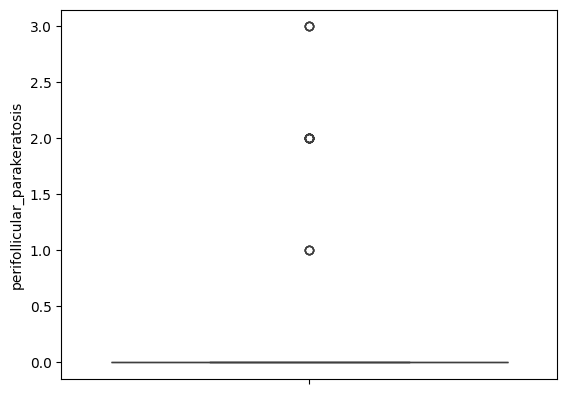

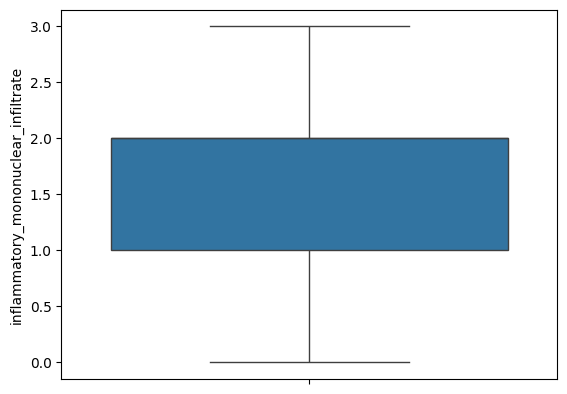

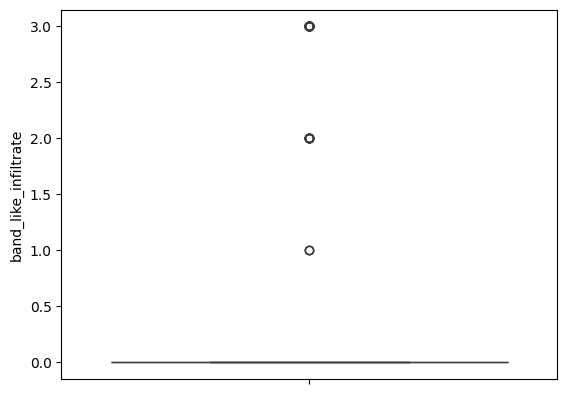

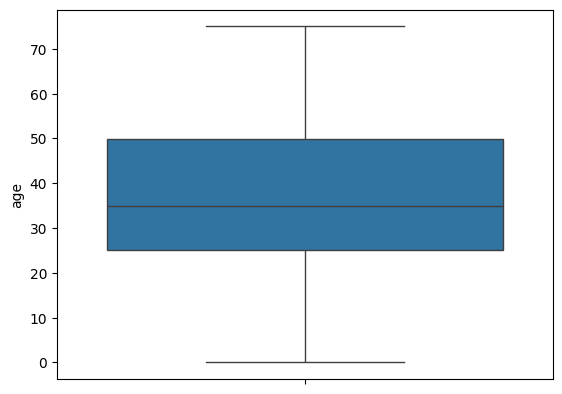

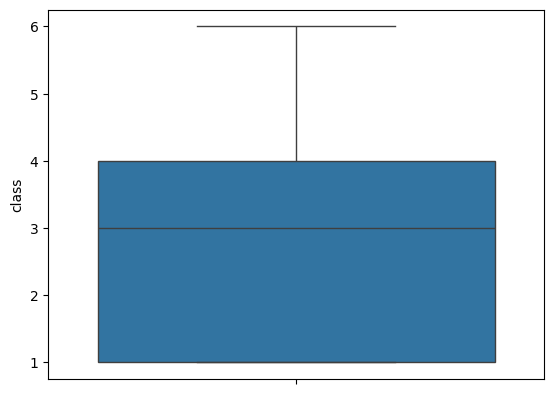

In [19]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [21]:
X=df.drop('class',axis=1)
y=df['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=21)


In [31]:
rob=RobustScaler()
X_train=rob.fit_transform(X_train)
X_test=rob.transform(X_test)


In [33]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\nConfusion Matrix: \n",confusion,"\nReport: ",classification)

Accuracy:  0.8734177215189873 
Confusion Matrix: 
 [[21  0  0  0  0  0]
 [ 6  9  0  1  0  0]
 [ 0  0 14  0  0  0]
 [ 2  0  0  8  0  0]
 [ 1  0  0  0 14  0]
 [ 0  0  0  0  0  3]] 
Report:                precision    recall  f1-score   support

           1       0.70      1.00      0.82        21
           2       1.00      0.56      0.72        16
           3       1.00      1.00      1.00        14
           4       0.89      0.80      0.84        10
           5       1.00      0.93      0.97        15
           6       1.00      1.00      1.00         3

    accuracy                           0.87        79
   macro avg       0.93      0.88      0.89        79
weighted avg       0.91      0.87      0.87        79



In [55]:
cv = StratifiedKFold()
c_values = [0.001, 0.01, 0.1, 1, 2, 5, 10, 100]
class_weight = ['balanced', None]

param_grid = [
    {
        'penalty': ['l2'],
        'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
        'C': c_values,
        'class_weight': class_weight
    },
    {
        'penalty': ['l1'],
        'solver': ['saga','liblinear'],
        'C': c_values,
        'class_weight': class_weight
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': c_values,
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'class_weight': class_weight
    },
    {
        'penalty': [None],
        'solver': ['lbfgs','newton-cg','newton-cholesky','sag','saga'],
        'class_weight': class_weight
    }
]


In [56]:


grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=cv,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100],
                          'class_weight': ['balanced', None], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100],
                          'class_weight': ['balanced', None], 'penalty': ['l1'],
                          'solver': ['saga', 'liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100],
                          'class_weight': ['balanced', None],
                          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'class_weight': ['balanced', None], 'penalty': [None],
                          'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                     'sag', 'saga']}],
             scoring='accuracy')

In [58]:
grid.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [60]:
grid.best_score_

np.float64(0.9785064935064934)

In [61]:
y_pred=grid.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\nConfusion Matrix: \n",confusion,"\nReport: ",classification)


Accuracy:  0.8987341772151899 
Confusion Matrix: 
 [[21  0  0  0  0  0]
 [ 3 11  0  2  0  0]
 [ 0  0 14  0  0  0]
 [ 2  0  0  8  0  0]
 [ 1  0  0  0 14  0]
 [ 0  0  0  0  0  3]] 
Report:                precision    recall  f1-score   support

           1       0.78      1.00      0.88        21
           2       1.00      0.69      0.81        16
           3       1.00      1.00      1.00        14
           4       0.80      0.80      0.80        10
           5       1.00      0.93      0.97        15
           6       1.00      1.00      1.00         3

    accuracy                           0.90        79
   macro avg       0.93      0.90      0.91        79
weighted avg       0.92      0.90      0.90        79



In [62]:
oneVone=OneVsOneClassifier(estimator=LogisticRegression())
oneVone.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [63]:
y_pred=oneVone.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\nConfusion Matrix: \n",confusion,"\nReport: ",classification)


Accuracy:  0.9493670886075949 
Confusion Matrix: 
 [[21  0  0  0  0  0]
 [ 0 14  0  2  0  0]
 [ 0  0 14  0  0  0]
 [ 1  0  0  9  0  0]
 [ 1  0  0  0 14  0]
 [ 0  0  0  0  0  3]] 
Report:                precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00        14
           4       0.82      0.90      0.86        10
           5       1.00      0.93      0.97        15
           6       1.00      1.00      1.00         3

    accuracy                           0.95        79
   macro avg       0.96      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



In [72]:
model_proba=grid.predict_proba(X_test)

roc_auc_ovr=roc_auc_score(y_test,model_proba,multi_class='ovr')
roc_auc_ovo=roc_auc_score(y_test,model_proba,multi_class='ovo')

print('ROC AUC SCORE ONEvsONE: ',roc_auc_ovo,'\nROC AUC SCOrRE ONEvsREST: ',roc_auc_ovr)

ROC AUC SCORE ONEvsONE:  0.9955813492063491 
ROC AUC SCOrRE ONEvsREST:  0.9952194041867953
